In [1]:
import random

import pandas as pd

from caveat import report
from caveat.features import participation, sequence, times

In [2]:
observed = pd.read_csv("data/synthetic_population.csv")


def down_sample(df, p):
    n_samples = int(len(df.pid.unique()) * p)
    sample_ids = random.sample(list(df.pid.unique()), n_samples)
    sampled = df[df.pid.isin(sample_ids)]
    return sampled


sampled = {
    "sampled_a": down_sample(observed, 0.6),
    "sampled_b": down_sample(observed, 0.01),
}

In [3]:
report.report_diff(observed, sampled, participation.participation_rates)

observed  sampled_a  sampled_a delta  sampled_b  \
participation rate home          2.170   2.166667        -0.003333        2.2   
                   work          1.002   1.003333         0.001333        1.0   
                   shop          0.837   0.858333         0.021333        1.0   
                   leisure       0.647   0.643333        -0.003667        0.7   
                   education     0.441   0.420000        -0.021000        0.3   

                              sampled_b delta  
participation rate home                 0.030  
                   work                -0.002  
                   shop                 0.163  
                   leisure              0.053  
                   education           -0.141

In [4]:
report.report_diff(observed, sampled, times.average_start_times)

observed   sampled_a  sampled_a delta  \
average start time home       559.430876  558.207692        -1.223183   
                   work       417.544910  417.857143         0.312233   
                   shop       637.132616  642.087379         4.954762   
                   leisure    829.961360  819.132124       -10.829236   
                   education  858.707483  864.583333         5.875850   

                                sampled_b  sampled_b delta  
average start time home        565.909091         6.478215  
                   work        417.000000        -0.544910  
                   shop        589.500000       -47.632616  
                   leisure    1011.428571       181.467211  
                   education   730.000000      -128.707483

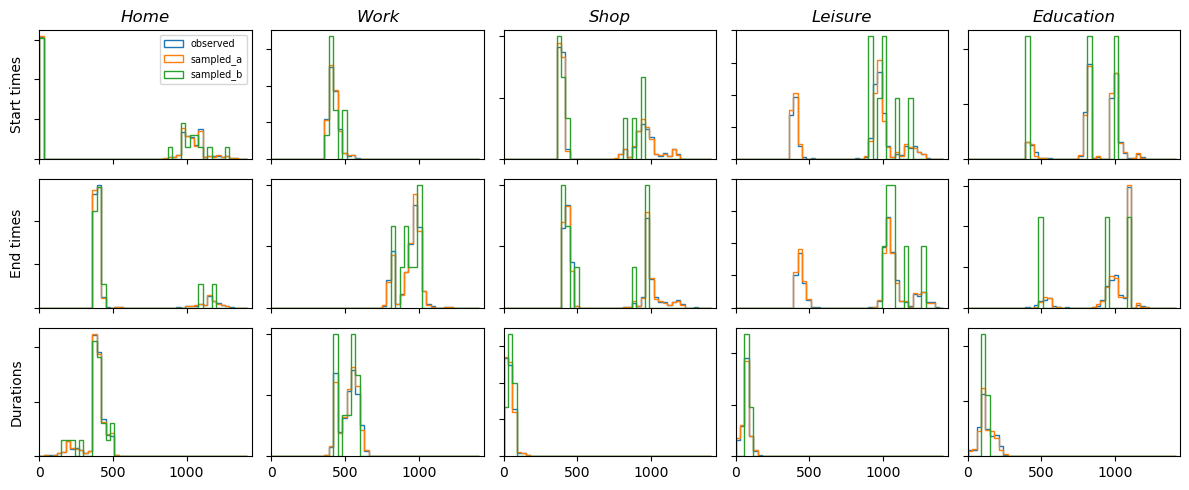

In [5]:
_ = times.times_distributions_plot(observed, sampled, figsize=(12, 5))

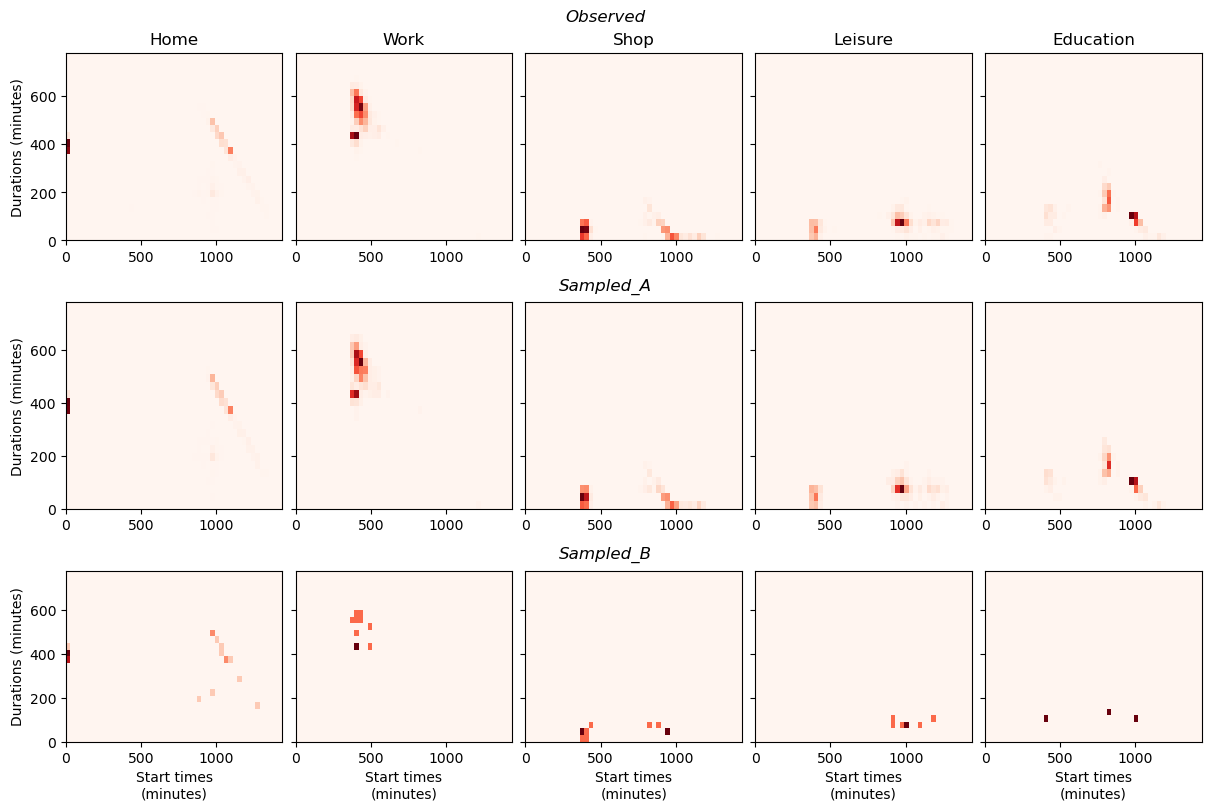

In [6]:
_ = times.joint_time_distributions_plot(observed, sampled, figsize=(12, 8))

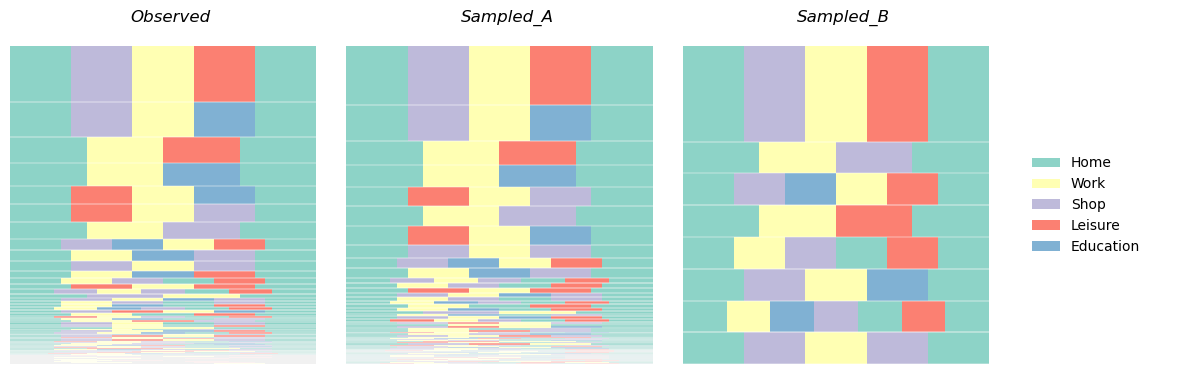

In [7]:
_ = sequence.sequence_prob_plot(observed, sampled, figsize=(12, 4))